<a href="https://colab.research.google.com/github/Professor-Sathish/GE8151_PSPP/blob/master/faceproa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install face-recognition

     |████████████████████████████████| 100.2MB 41kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=082327982f966c6790761b83f421ffa9e70a0a2cea20bd71ac358e4e1467a1c9
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#train my face 
import face_recognition

sathish = face_recognition.load_image_file("/content/gdrive/My Drive/Face attendance project/sathish.jpg")
sathish_encoding = face_recognition.face_encodings(picture_of_me)[0]
dinesh = face_recognition.load_image_file("/content/gdrive/My Drive/Face attendance project/dinesh.jpg")
dinesh_encoding = face_recognition.face_encodings(picture_of_me)[0]
rajesh= face_recognition.load_image_file("/content/gdrive/My Drive/Face attendance project/rajesh.jpg")
rajesh_encoding = face_recognition.face_encodings(picture_of_me)[0]
venkadesh = face_recognition.load_image_file("/content/gdrive/My Drive/Face attendance project/venkadesh.jpg")
venkadesh_encoding = face_recognition.face_encodings(picture_of_me)[0]
#print("Training input image array")
#im = Image.open("/content/gdrive/My Drive/Face attendance project/obama-training.jpg")
#display(picture_of_me)

I found 3 face(s) in this photograph.
A face is located at pixel location Top: 399, Left: 627, Bottom: 517, Right: 744
It's not a picture of sathish


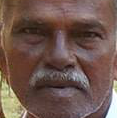

A face is located at pixel location Top: 466, Left: 887, Bottom: 608, Right: 1028
It's a picture of sathish


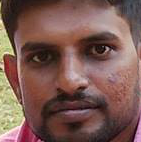

A face is located at pixel location Top: 523, Left: 1245, Bottom: 665, Right: 1386
It's not a picture of sathish


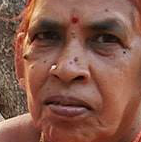

In [0]:
#find_faces_in_picture
from PIL import Image
import face_recognition
import cv2


# Load the jpg file into a numpy array
image = face_recognition.load_image_file("/content/gdrive/My Drive/Face attendance project/fg2.jpg")
#print("input image")
#display(image)
# Find all the faces in the image using the default HOG-based model.
# This method is fairly accurate, but not as accurate as the CNN model and not GPU accelerated.
# See also: find_faces_in_picture_cnn.py
#face_locations = face_recognition.face_locations(image)
 #number_of_times_to_upsample=0,
face_locations = face_recognition.face_locations(image, model="cnn")

print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
    im = Image.open("/content/gdrive/My Drive/Face attendance project/fg2.jpg")
    im = im.crop((left, top, right, bottom))
    im.save('/content/gdrive/My Drive/Face attendance project/un.jpeg')
    
    # my_face_encoding now contains a universal 'encoding' of my facial features that can be compared to any other picture of a face!
    un = face_recognition.load_image_file("/content/gdrive/My Drive/Face attendance project/un.jpeg")
    
    unknown_face_encoding = face_recognition.face_encodings(un)[0]
    

    # Now we can see the two face encodings are of the same person with `compare_faces`!
    results = face_recognition.compare_faces([sathish_encoding], unknown_face_encoding)
    if results[0] == True:
      print("It's a picture of sathish")
      display(pil_image)
    else:
      print("It's not a picture of sathish")
      display(pil_image)
    

In [0]:
#find_faces_in_picture using array
from PIL import Image,ImageDraw
import face_recognition
import cv2

#training
known_face_encodings = [sathish_encoding,dinesh_encoding,rajesh_encoding,venkadesh_encoding]
known_face_names=[sathish,dinesh,rajesh,venkadesh]

# Load the jpg file into a numpy array
image = face_recognition.load_image_file("/content/gdrive/My Drive/Face attendance project/frg2.jpg")
face_locations = face_recognition.face_locations(image,number_of_times_to_upsample=0, model="cnn")
face_encodings=face_recognition.face_encodings(image,face_locations)

print("I found {} face(s) in this photograph.".format(len(face_locations)))

#convert
pill_image=Image.fromarray(image)

#draw
draw=ImageDraw.Draw(pill_image)

#loop through test images

for (top,right,bottom,left),face_encoding in zip(face_locations,face_encodings):
  matches=face_recognition.compare_faces(known_face_encodings,face_encoding)
  name="unknown person"
  #match tue
  if True in matches:
    first_match_index=matches.index[True]
    name=known_face_names[first_match_index]
    #draw rectangle
    draw.rectangle(((left,top),(right,bottom)),outline=(0,0,0))
    #draw label
    text_width,text_height=draw.textsize(name)
    draw.rectangle(((left,bottom-text_height),(right,bottom+5)),fill=(0,0,0),outline=(0,0,0))
    draw.text((left+6,bottom-text_height),name,fill=(255,255,255,255))
del draw

#display image
pill_image.show()

#save
pill_image.save('identify.jpg')

I found 6 face(s) in this photograph.


TypeError: ignored

In [0]:
#find_faces_in_picture using array
from PIL import Image,ImageDraw
import face_recognition
import cv2

#training
known_face_encodings = [sathish_encoding,dinesh_encoding,rajesh_encoding,venkadesh_encoding]
known_face_names=[sathish,dinesh,rajesh,venkadesh]

# Load the jpg file into a numpy array
image = face_recognition.load_image_file("/content/gdrive/My Drive/Face attendance project/frg2.jpg")
face_locations = face_recognition.face_locations(image,number_of_times_to_upsample=0, model="cnn")
face_encodings=face_recognition.face_encodings(image,face_locations)

print("I found {} face(s) in this photograph.".format(len(face_locations)))

#convert
pill_image=Image.fromarray(image)

#draw
draw=ImageDraw.Draw(pill_image)

#loop through test images

for (top,right,bottom,left),face_encoding in zip(face_locations,face_encodings):
  matches=face_recognition.compare_faces(known_face_encodings,face_encoding)
  print(matches)
  name="unknown person"

I found 6 face(s) in this photograph.
[False, False, False, False]
[True, True, True, True]
[False, False, False, False]
[False, False, False, False]
[False, False, False, False]
[False, False, False, False]
